<a href="https://colab.research.google.com/github/ahmadarbain/skin-disease/blob/main/Skin_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! mkdir __skin_diseas__
%cd __skin_diseas__

/content/__skin_diseas__


In [2]:
 ! pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahmadarbain","key":"9ab2c57986fc5a8de43228518bfe736b"}'}

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d shubhamgoel27/dermnet

 99% 1.71G/1.72G [00:50<00:00, 25.5MB/s]
100% 1.72G/1.72G [00:50<00:00, 36.8MB/s]


In [7]:
! unzip dermnet.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keloids-8.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keloids-80.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keloids-9.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-100.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-101.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-102.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-103.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-104.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-105.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-106.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthom

#Exploratory Data Analysis

Bullous Disease Photos


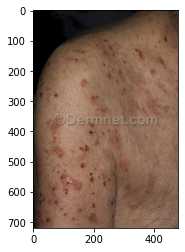

Vasculitis Photos


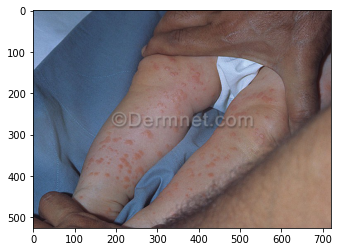

Vascular Tumors


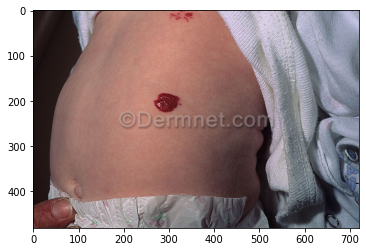

Lupus and other Connective Tissue diseases


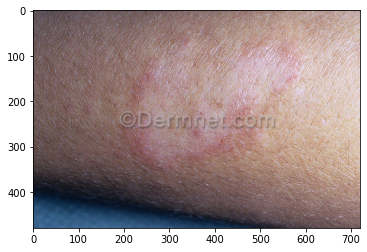

Cellulitis Impetigo and other Bacterial Infections


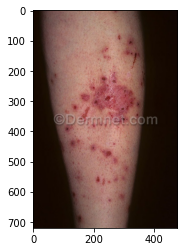

Seborrheic Keratoses and other Benign Tumors


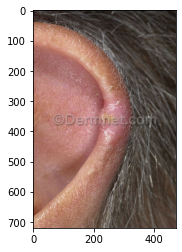

Hair Loss Photos Alopecia and other Hair Diseases


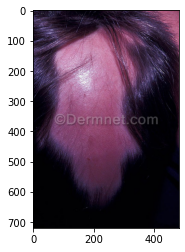

Psoriasis pictures Lichen Planus and related diseases


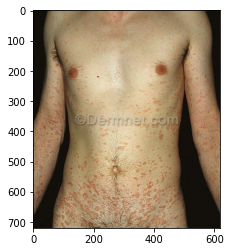

Systemic Disease


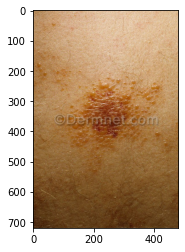

Melanoma Skin Cancer Nevi and Moles


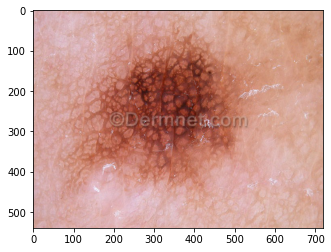

Acne and Rosacea Photos


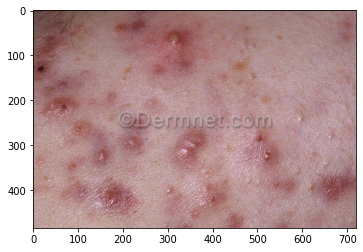

Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions


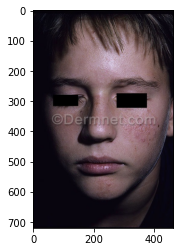

Exanthems and Drug Eruptions


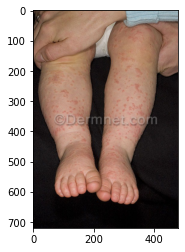

Nail Fungus and other Nail Disease


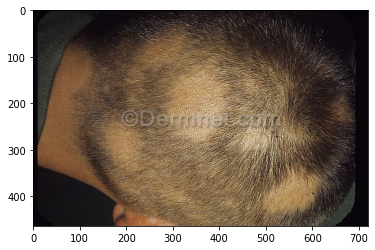

Urticaria Hives


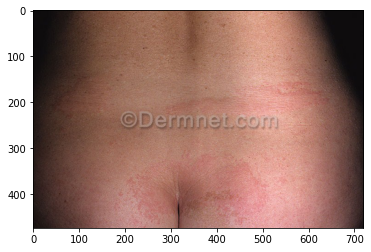

Eczema Photos


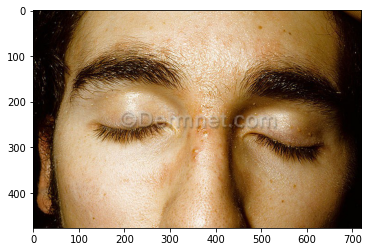

Warts Molluscum and other Viral Infections


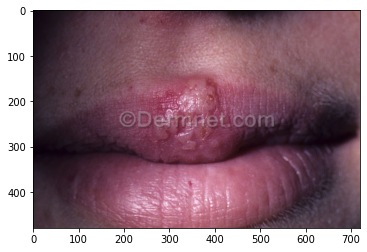

Herpes HPV and other STDs Photos


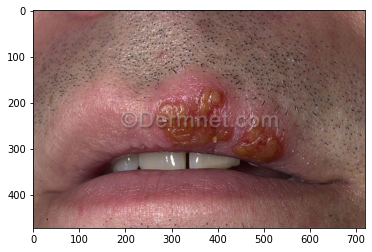

Tinea Ringworm Candidiasis and other Fungal Infections


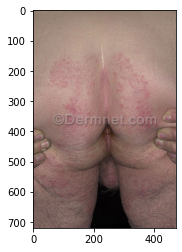

Scabies Lyme Disease and other Infestations and Bites


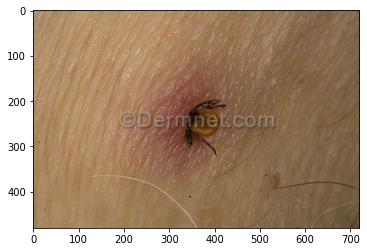

Poison Ivy Photos and other Contact Dermatitis


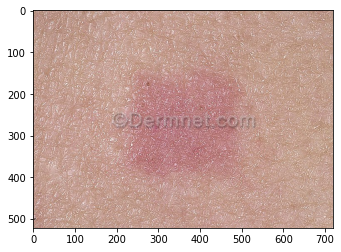

Atopic Dermatitis Photos


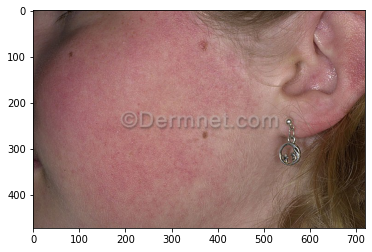

Light Diseases and Disorders of Pigmentation


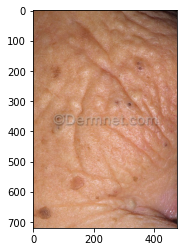

In [8]:
import glob, random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import pathlib

data_train = pathlib.Path('./train')
data_val = pathlib.Path('./test')

for foldername in os.listdir("./train/"):
  file_path_type = ["./train/"+foldername+"/*.jpg"]
  print(foldername)
  images = glob.glob(random.choice(file_path_type))
  random_image = random.choice(images)
  img = mpimg.imread(random_image)
  imgplot = plt.imshow(img)
  plt.show()

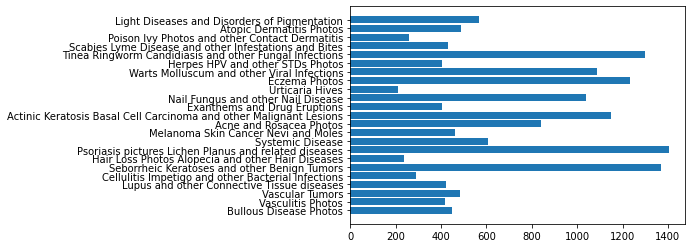

In [9]:
x=[]
y=[]
for foldername in os.listdir("./train/"):
  x.append(foldername)
  count=0
  for filename in os.listdir("./train/"+foldername):
    count+=1
  y.append(count)
plt.barh(x,y)
plt.show()

In [10]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [11]:
image_train = len(list(data_train.glob('*/*.jpg')))
image_valid = len(list(data_val.glob('*/*.jpg')))
print(image_train)
print(image_valid)

15557
4002


In [12]:
batch_size = 64
img_height = 128
img_width = 128

In [13]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_train,
  #validation_split=0.2,
  #subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True)

Found 15557 files belonging to 23 classes.


In [14]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_val,
  #validation_split=0.2,
  #subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True)

Found 4002 files belonging to 23 classes.


In [15]:
class_names = train_data.class_names

for class_name in class_names:
  print(class_name)

['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']


In [16]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 128, 128, 3)
(64,)


In [17]:
def get_dataset_partitions_tf(ds, train_split = 0.8,val_split = 0.2,shuffle = True,shuffle_size = 10000):
  assert(train_split+val_split) == 1
  ds_size = len(ds)
  if shuffle:
    ds = ds.shuffle(shuffle_size, seed = 12)
  train_size = int(train_split*ds_size)
  val_size = int(val_split * ds_size)

  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  return train_ds, val_ds

In [18]:
train_ds, val_ds = get_dataset_partitions_tf(train_data)

In [19]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
resize_and_rescale = tf.keras.Sequential([
                     layers.experimental.preprocessing.Resizing(img_height,img_width),
                     layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [21]:
import numpy as np

normalized_ds = train_ds.map(lambda x, y: (resize_and_rescale(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 0.9997186


In [22]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
  ]
)

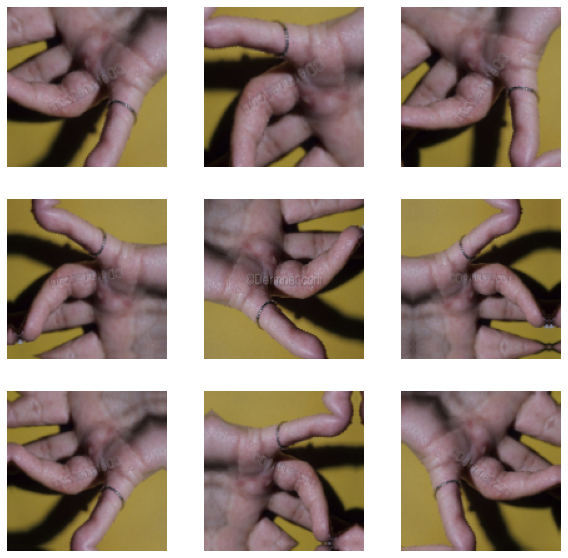

In [23]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [24]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [25]:
from tensorflow.keras import models, layers

model = models.Sequential([
                           resize_and_rescale,
                           layers.Conv2D(64, kernel_size = (3,3), activation = 'relu', input_shape = (batch_size,img_height,img_width,3) ),
                           layers.MaxPooling2D((2,2)),
                           layers.Conv2D(128, kernel_size = (3,3), activation = 'relu'),
                           layers.MaxPooling2D((2,2)), 
                           layers.Conv2D(128, kernel_size = (3,3), activation = 'relu'),
                           layers.MaxPooling2D((2,2)),    
                           layers.Conv2D(128, (3, 3), activation='relu'),
                           layers.MaxPooling2D((2, 2)),
                           layers.Conv2D(128, (3, 3), activation='relu'),
                           layers.MaxPooling2D((2, 2)),    
                           layers.Flatten(),
                           layers.Dense(128, activation='relu'),
                           layers.Dense(23, activation='softmax')
])
model.build(input_shape = (batch_size,128,128,3))

In [26]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (64, 126, 126, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (64, 63, 63, 64)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (64, 61, 61, 128)         73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (64, 30, 30, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (64, 28, 28, 128)        

In [ ]:
epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  verbose=1
)

Epoch 1/200
195/195 [==============================] - 100s 511ms/step - loss: 2.9718 - accuracy: 0.0918 - val_loss: 2.9149 - val_accuracy: 0.1335
Epoch 2/200
195/195 [==============================] - 89s 455ms/step - loss: 2.9041 - accuracy: 0.1362 - val_loss: 2.8441 - val_accuracy: 0.1527
Epoch 3/200
195/195 [==============================] - 88s 452ms/step - loss: 2.8430 - accuracy: 0.1607 - val_loss: 2.7700 - val_accuracy: 0.1829
Epoch 4/200
195/195 [==============================] - 94s 482ms/step - loss: 2.7926 - accuracy: 0.1718 - val_loss: 2.7225 - val_accuracy: 0.1948
Epoch 5/200
195/195 [==============================] - 92s 471ms/step - loss: 2.7581 - accuracy: 0.1802 - val_loss: 2.7356 - val_accuracy: 0.1768
Epoch 6/200
195/195 [==============================] - 88s 451ms/step - loss: 2.7243 - accuracy: 0.1829 - val_loss: 2.6958 - val_accuracy: 0.1947
Epoch 7/200
195/195 [==============================] - 86s 444ms/step - loss: 2.7046 - accuracy: 0.1914 - val_loss: 2.6285 

In [1]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: ignored

In [ ]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[23].numpy().astype('uint8')
    first_label = labels_batch[25].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[23])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
model.save('model.h5')